# **Programa de Pós-Graduação em Engenharia Elétrica e Computação**
## Trabalho: Filtragem
### Marcelo Estevão da Silva (marcelo.estevao@alu.ufc.br)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importando as bibliotecas
import numpy as np
import pylab
from scipy.signal import convolve2d
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import skimage as sk
from skimage import data
from skimage.util import img_as_ubyte
from scipy import signal
import matplotlib.image as mpimg

# **Configuração C1a**

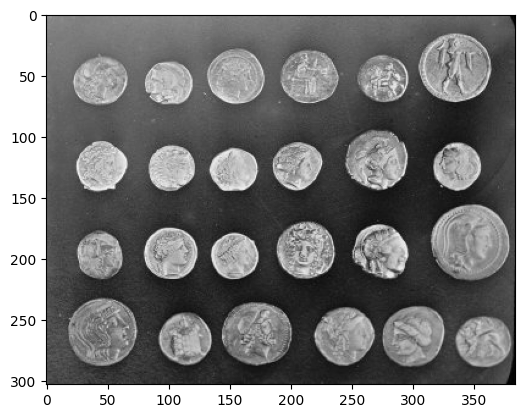

In [3]:
# importando a imagem
img = img_as_ubyte(data.coins())
plt.imshow(img,'gray')

## C1a - Ajuste de contraste

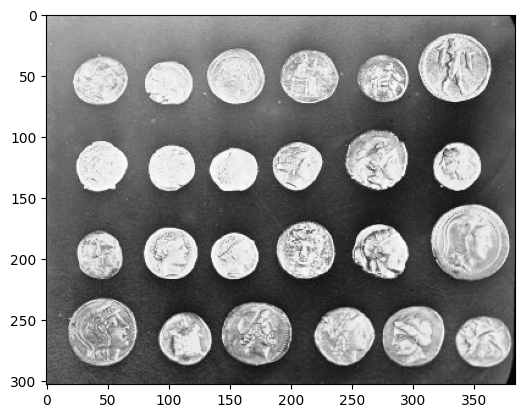

In [4]:
k1 = 0.8
k2 = 1
k3 = 0.2
lim1 = 85
lim2 = 170

esp = pylab.arange(0, 255, 1.0)
img1 = pylab.copy(img)

div1 = esp[0:lim1]
div1 = (div1 - 0)*k1 + 0

div2 = esp[lim1:lim2]
div2 = (div2 - lim1)*k2 + div1[-1]

div3 = esp[lim2:256]
div3 = (div3 - lim2)*k3 + div2[-1]

for i in range(0, img1.shape[0]):
    for j in range(0, img1.shape[1]):
        if img1[i, j] < lim1:
            img1[i,j] = (img1[i,j] - 0)*k1 + 0
        elif img1[i,j] < lim2:
            img1[i,j] = (img1[i,j] - lim1)*k2 + div1[-1]
        else:
            img1[i,j] = (img1[i,j] - lim2)*k3 + div2[-1]

plt.imshow(img1,'gray')

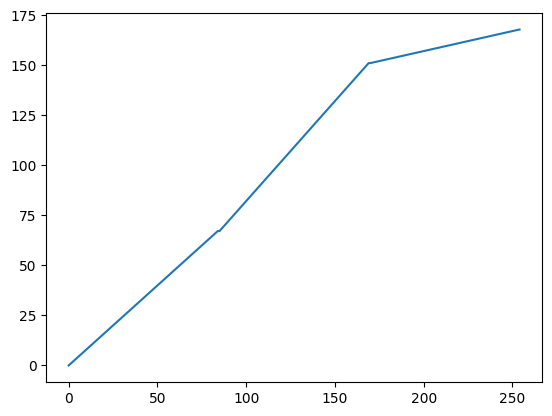

In [5]:
# linearização
esp[0:lim1] = div1
esp[lim1:lim2] = div2
esp[lim2:255] = div3

pylab.plot(esp)
pylab.show()

# C1a - Filtragem (Gaussiano)

In [6]:
img11 = pylab.copy(img1)
sigma = 1
s = 2*sigma**2
n = 5

masc = np.ones((n,n))
for x in range(-n//2,1+n//2):
    for y in range(-n//2,1+n//2):
        gauss = np.exp(-(x**2 + y**2)/s)/(s*np.pi)
        masc[x+(n//2),y+(n//2)] = np.ceil(255*gauss)

print(masc)

[[ 1.  4.  6.  4.  1.]
 [ 4. 15. 25. 15.  4.]
 [ 6. 25. 41. 25.  6.]
 [ 4. 15. 25. 15.  4.]
 [ 1.  4.  6.  4.  1.]]


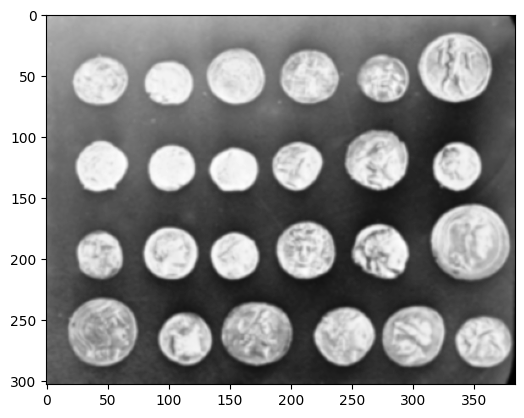

In [7]:
# convolução

img11 = convolve2d(img11, masc,'same','symm')
plt.imshow(img11,'gray')

# C1a - Limiarização (Global)

In [8]:
img111 = pylab.copy(img11)
media = np.mean(img111)
h,v = img111.shape

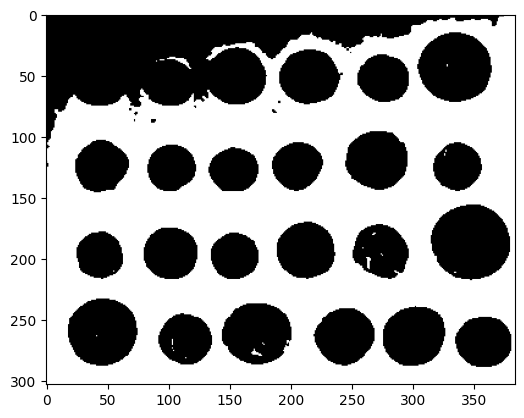

In [9]:
for i in range(0,h):
    for j in range(0,v):
        if img111[i,j] < media:
            img111[i,j] = 255
        else:
            img111[i,j] = 0
plt.imshow(img111, 'gray')
plt.show()

# C1a - Detecção de bordas (Roberts)

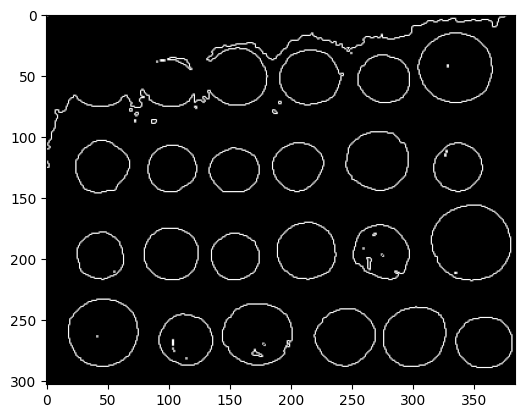

In [10]:
img1111 = pylab.copy(img111)
h1 = np.array([[1,0],[0, -1]])
h2 = np.array([[0,1],[-1, 0]])
img1111 = pylab.sqrt( (signal.convolve2d(img1111, h1, 'same','symm')**2) + ((signal.convolve2d(img1111, h2,'same','symm')**2)))
plt.imshow(img1111,'gray')

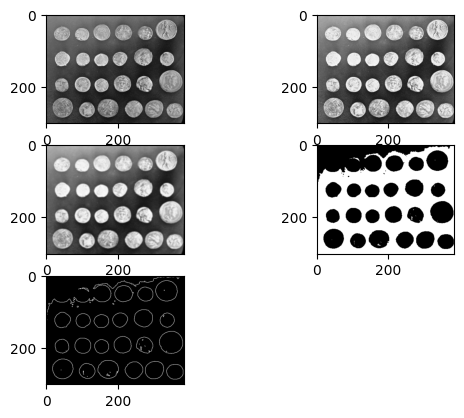

In [11]:
plt.subplot(321)
plt.imshow(img,'gray')
plt.subplot(322)
plt.imshow(img1,'gray')
plt.subplot(323)
plt.imshow(img11,'gray')
plt.subplot(324)
plt.imshow(img111,'gray')
plt.subplot(325)
plt.imshow(img1111,'gray')
plt.show()

# **Configuração C1b**

# C1b - Ajuste de contraste

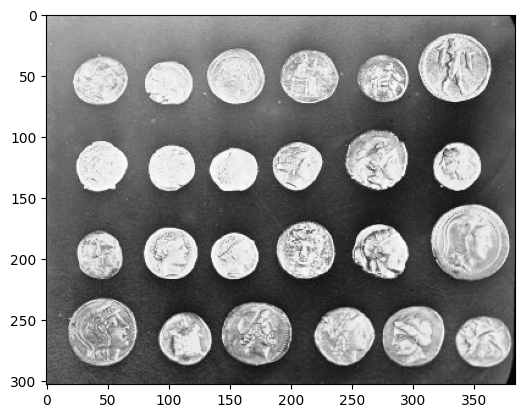

In [12]:
k1 = 0.8
k2 = 1
k3 = 0.2
lim1 = 85
lim2 = 170

esp = pylab.arange(0, 255, 1.0)
img2 = pylab.copy(img)

div1 = esp[0:lim1]
div1 = (div1 - 0)*k1 + 0

div2 = esp[lim1:lim2]
div2 = (div2 - lim1)*k2 + div1[-1]

div3 = esp[lim2:256]
div3 = (div3 - lim2)*k3 + div2[-1]

for i in range(0, img2.shape[0]):
    for j in range(0, img2.shape[1]):
        if img2[i, j] < lim1:
            img2[i,j] = (img2[i,j] - 0)*k1 + 0
        elif img2[i,j] < lim2:
            img2[i,j] = (img2[i,j] - lim1)*k2 + div1[-1]
        else:
            img2[i,j] = (img2[i,j] - lim2)*k3 + div2[-1]

plt.imshow(img2,'gray')

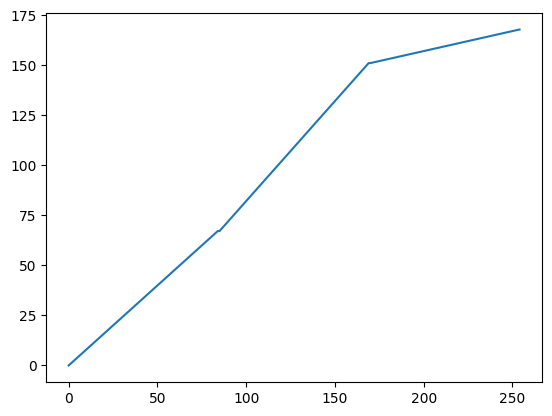

In [13]:
esp[0:lim1] = div1
esp[lim1:lim2] = div2
esp[lim2:255] = div3

pylab.plot(esp)
pylab.show()

# C1b - Filtragem (mediana)

[[  5   5  75 ...   2   0   0]
 [ 10  75 113 ...   5   0   0]
 [108 113 114 ...   9   0   0]
 ...
 [ 54  57  59 ...   5   0   0]
 [  5  51  56 ...   5   0   0]
 [  0   0   5 ...   0   0   0]]


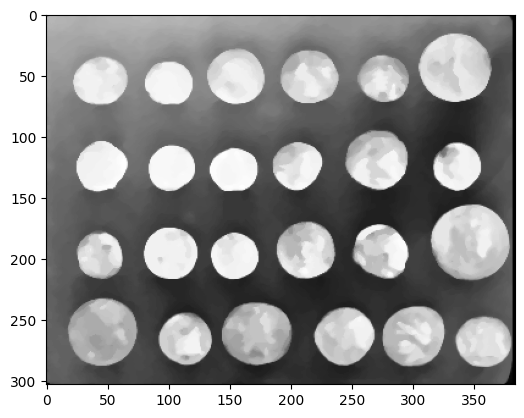

In [14]:
img22 = pylab.copy(img2)
n = 5
temp = []
indexer = n//2
data_final = []
data_final = np.zeros((len(img22),len(img22[0])))
for i in range(len(img22)):
    for j in range(len(img22[0])):
        for z in range(n):
            if i + z - indexer < 0 or i + z - indexer > len(img22) - 1:
                for c in range(n):
                    temp.append(0)
            else:
                 if j + z - indexer < 0 or j + indexer > len(img22[0]) - 1:
                    temp.append(0)
                 else:
                    for k in range(n):
                        temp.append(img22[i + z - indexer][j + k - indexer])
        temp.sort()
        img22[i][j] = temp[len(temp) // 2]
        temp = []
print(img22)
plt.imshow(img22, 'gray')

# C1b - Limiarização (Global)

In [15]:
img222 = pylab.copy(img22)
media = np.mean(img222)
h,v = img222.shape

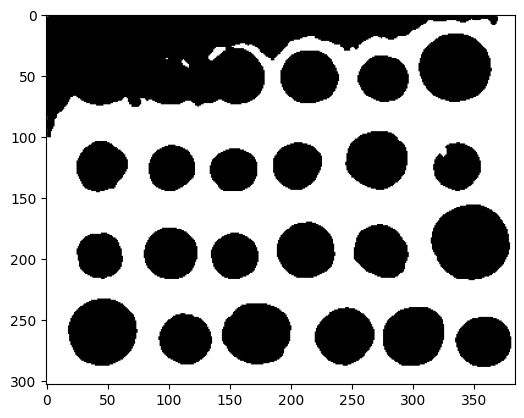

In [16]:
for i in range(0,h):
    for j in range(0,v):
        if img222[i,j] < media:
            img222[i,j] = 255
        else:
            img222[i,j] = 0
plt.imshow(img222, 'gray')
plt.show()

# C1b - Detecção de bordas (Prewitt)

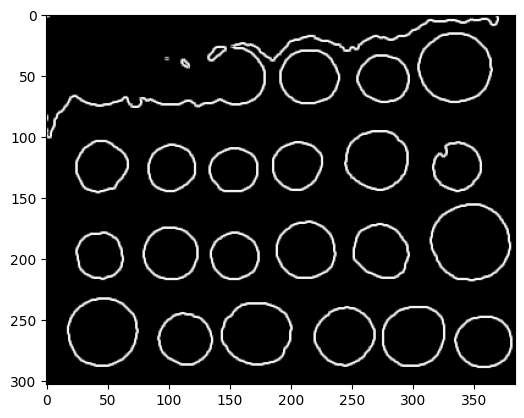

In [17]:
img2222 = pylab.copy(img222)
h1 = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
h2 = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
img2222 = pylab.sqrt( (signal.convolve2d(img2222, h1, 'same','symm')**2) + ((signal.convolve2d(img2222, h2,'same','symm')**2)))
plt.imshow(img2222,'gray')
plt.show()

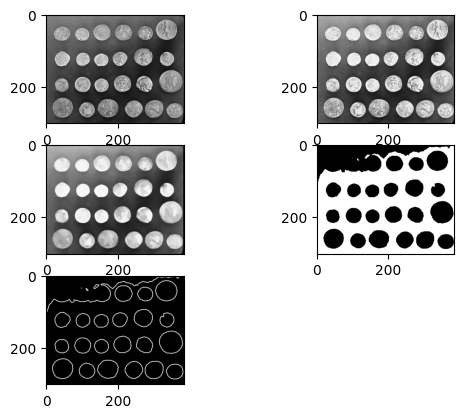

In [18]:
plt.subplot(321)
plt.imshow(img,'gray')
plt.subplot(322)
plt.imshow(img2,'gray')
plt.subplot(323)
plt.imshow(img22,'gray')
plt.subplot(324)
plt.imshow(img222,'gray')
plt.subplot(325)
plt.imshow(img2222,'gray')
plt.show()

# **Configuração C2a**

### C2a - Ajuste de contraste

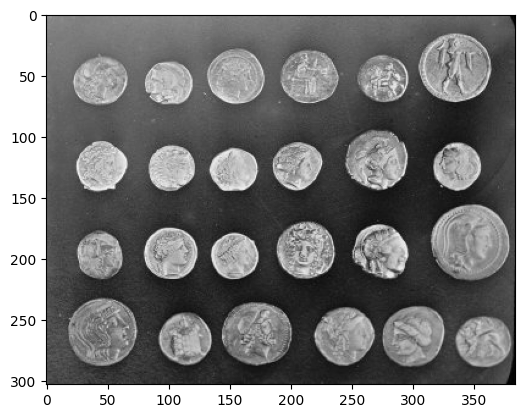

In [19]:
k1 = 0.8
k2 = 1
k3 = 0.2
lim1 = 85
lim2 = 170

esp = pylab.arange(0, 255, 1.0)
img3 = pylab.copy(img)

div1 = esp[0:lim1]
div1 = (div1 - 0)*k1 + 0

div2 = esp[lim1:lim2]
div2 = (div2 - lim1)*k2 + div1[-1]

div3 = esp[lim2:256]
div3 = (div3 - lim2)*k3 + div2[-1]

# Seguindo a divisão apresentada na questão para limerização.
for i in range(0, img1.shape[0]):
    for j in range(0, img1.shape[1]):
        if img1[i, j] < lim1:
            img1[i,j] = (img1[i,j] - 0)*k1 + 0
        elif img1[i,j] < lim2:
            img1[i,j] = (img1[i,j] - lim1)*k2 + div1[-1]
        else:
            img1[i,j] = (img1[i,j] - lim2)*k3 + div2[-1]

plt.imshow(img3,'gray') # Plotando a imagem

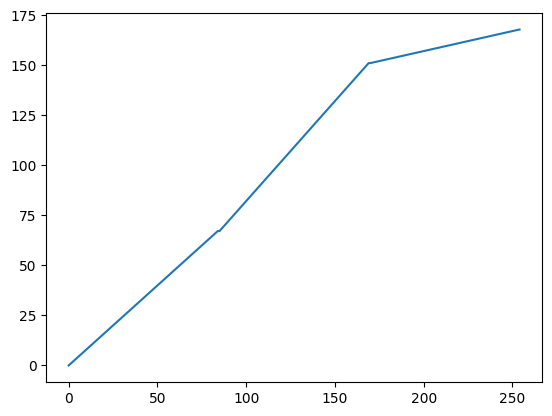

In [20]:
# linearização
esp[0:lim1] = div1
esp[lim1:lim2] = div2
esp[lim2:255] = div3

pylab.plot(esp)
pylab.show()

# C1a - Filtragem (Gaussiano)

In [21]:
img33 = pylab.copy(img3)
sigma = 1
s = 2*sigma**2
n = 5

masc = np.ones((n,n))
for x in range(-n//2,1+n//2):
    for y in range(-n//2,1+n//2):
        gauss = np.exp(-(x**2 + y**2)/s)/(s*np.pi)
        masc[x+(n//2),y+(n//2)] = np.ceil(255*gauss)

print(masc)

[[ 1.  4.  6.  4.  1.]
 [ 4. 15. 25. 15.  4.]
 [ 6. 25. 41. 25.  6.]
 [ 4. 15. 25. 15.  4.]
 [ 1.  4.  6.  4.  1.]]


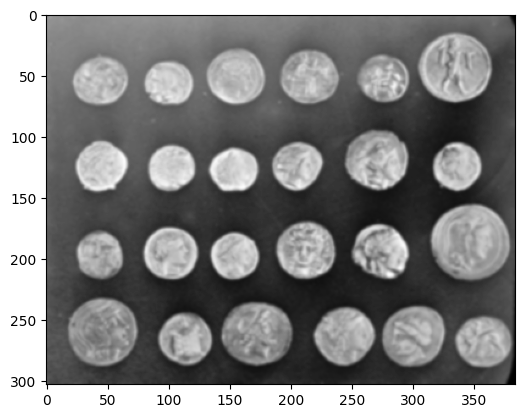

In [22]:
img33 = convolve2d(img33, masc,'same','symm')
plt.imshow(img33,'gray')

# C2a - Limiarização (Local)

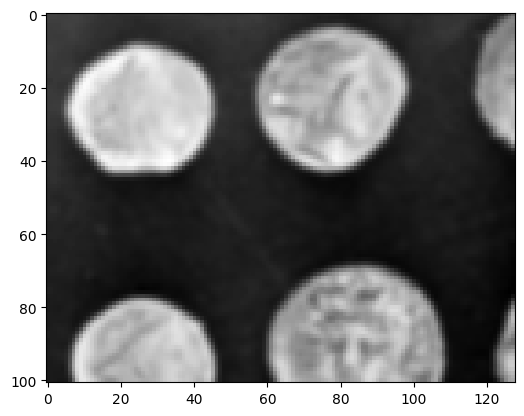

In [23]:
img333 = pylab.copy(img33)
h,v = img333.shape
lim1 = int(h/3)
lim2 = int(h/3)*2
lim3 = int(v/3)
lim4 = int(v/3)*2
img_corte = img333[lim1:lim2,lim3:lim4]
media = np.mean(img_corte)
plt.imshow(img_corte,'gray')

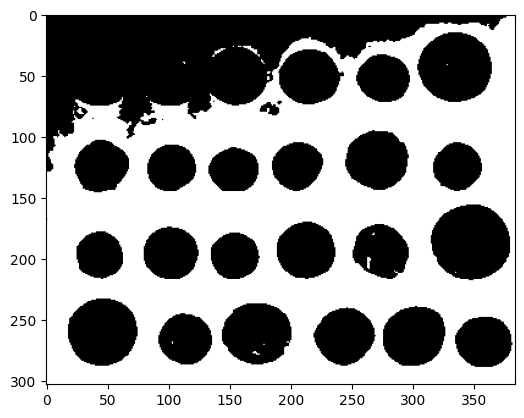

In [24]:
for i in range(0,h):
    for j in range(0,v):
        if img333[i,j] < media:
            img333[i,j] = 255
        else:
            img333[i,j] = 0
plt.imshow(img333, 'gray')
plt.show()

# C2a - Detecção de bordas (Roberts)

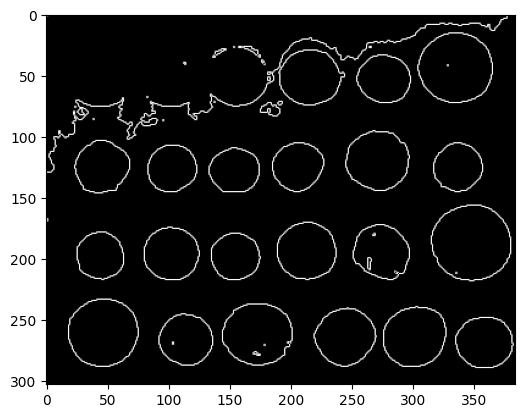

In [25]:
img3333 = pylab.copy(img333)
h1 = np.array([[1,0],[0, -1]])
h2 = np.array([[0,1],[-1, 0]])
img3333 = pylab.sqrt( (signal.convolve2d(img3333, h1, 'same','symm')**2) + ((signal.convolve2d(img3333, h2,'same','symm')**2)))
plt.imshow(img3333,'gray')

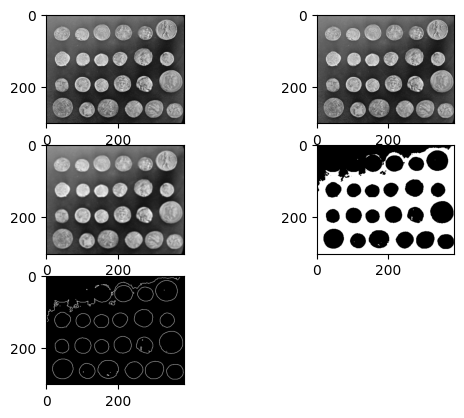

In [26]:
plt.subplot(321)
plt.imshow(img,'gray')
plt.subplot(322)
plt.imshow(img3,'gray')
plt.subplot(323)
plt.imshow(img33,'gray')
plt.subplot(324)
plt.imshow(img333,'gray')
plt.subplot(325)
plt.imshow(img3333,'gray')
plt.show()

# **Configuração C2b**

# C2b - Ajuste de contraste

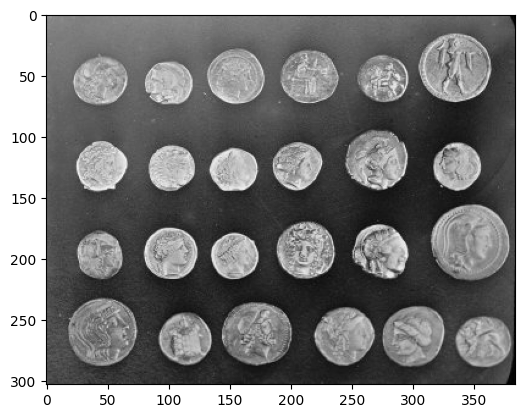

In [27]:
k1 = 0.8
k2 = 1
k3 = 0.2
lim1 = 85
lim2 = 170

esp = pylab.arange(0, 255, 1.0)
img4 = pylab.copy(img)

div1 = esp[0:lim1]
div1 = (div1 - 0)*k1 + 0

div2 = esp[lim1:lim2]
div2 = (div2 - lim1)*k2 + div1[-1]

div3 = esp[lim2:256]
div3 = (div3 - lim2)*k3 + div2[-1]

# Seguindo a divisão apresentada na questão para limerização.
for i in range(0, img1.shape[0]):
    for j in range(0, img1.shape[1]):
        if img1[i, j] < lim1:
            img1[i,j] = (img1[i,j] - 0)*k1 + 0
        elif img1[i,j] < lim2:
            img1[i,j] = (img1[i,j] - lim1)*k2 + div1[-1]
        else:
            img1[i,j] = (img1[i,j] - lim2)*k3 + div2[-1]

plt.imshow(img4,'gray') # Plotando a imagem

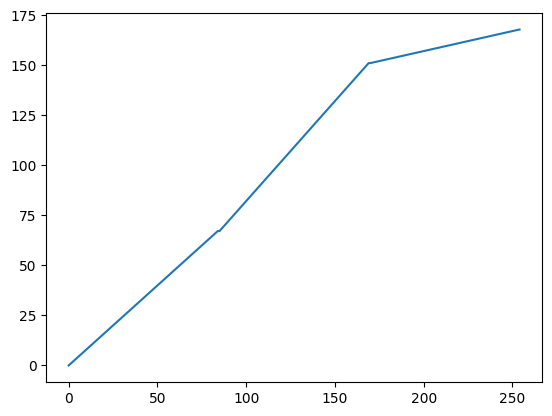

In [28]:
# linearização
esp[0:lim1] = div1
esp[lim1:lim2] = div2
esp[lim2:255] = div3

pylab.plot(esp)
pylab.show()

# C2b - Filtragem de ruído (Mediana)

[[  7   7  93 ...   3   0   0]
 [ 13  93 131 ...   7   0   0]
 [126 131 132 ...  12   0   0]
 ...
 [ 68  72  74 ...   7   0   0]
 [  7  64  71 ...   7   0   0]
 [  0   0   7 ...   0   0   0]]


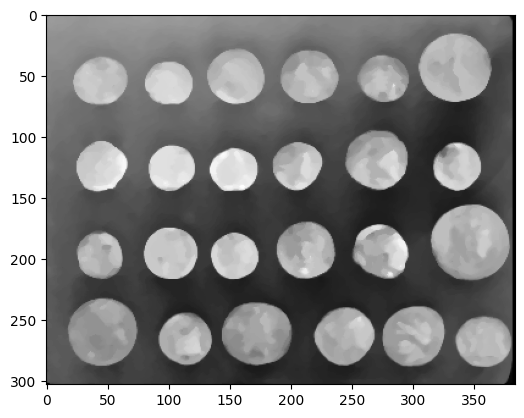

In [29]:
img44 = pylab.copy(img4)
n = 5
temp = []
indexer = n//2
data_final = []
data_final = np.zeros((len(img44),len(img44[0])))
for i in range(len(img44)):
    for j in range(len(img44[0])):
        for z in range(n):
            if i + z - indexer < 0 or i + z - indexer > len(img44) - 1:
                for c in range(n):
                    temp.append(0)
            else:
                 if j + z - indexer < 0 or j + indexer > len(img44[0]) - 1:
                    temp.append(0)
                 else:
                    for k in range(n):
                        temp.append(img44[i + z - indexer][j + k - indexer])
        temp.sort()
        img44[i][j] = temp[len(temp) // 2]
        temp = []
print(img44)
plt.imshow(img44, 'gray')

# C2a - Limiarização (Local)

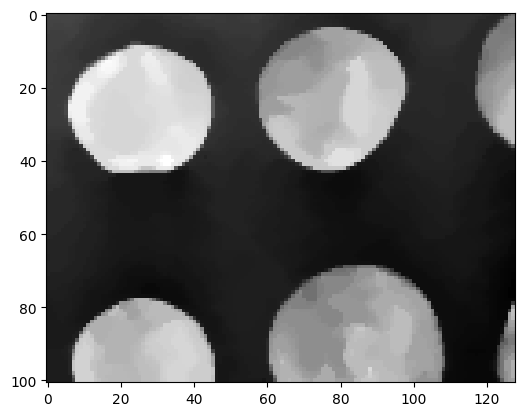

In [30]:
img444 = pylab.copy(img44)
h,v = img444.shape
lim1 = int(h/3)
lim2 = int(h/3)*2
lim3 = int(v/3)
lim4 = int(v/3)*2
img_corte = img444[lim1:lim2,lim3:lim4,]
media = np.mean(img_corte)
plt.imshow(img_corte,'gray')

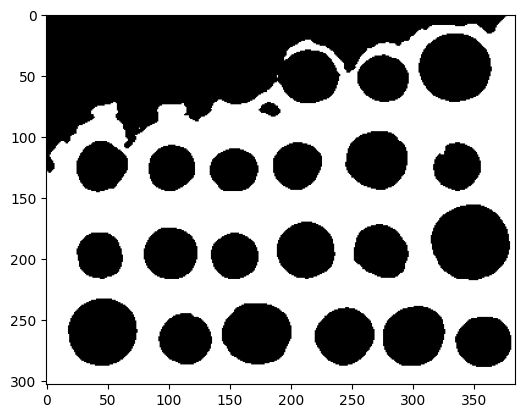

In [31]:
for i in range(0,h):
    for j in range(0,v):
        if img444[i,j] < media:
            img444[i,j] = 255
        else:
            img444[i,j] = 0
plt.imshow(img444, 'gray')
plt.show()

# C2b - Detecção de bordas (Prewitt)

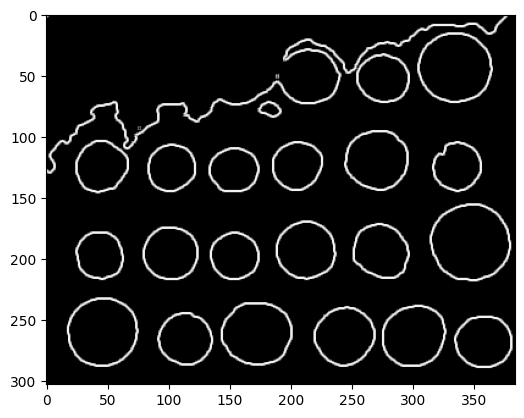

In [32]:
img4444 = pylab.copy(img444)
h1 = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
h2 = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
img4444 = pylab.sqrt( (signal.convolve2d(img4444, h1, 'same','symm')**2) + ((signal.convolve2d(img4444, h2,'same','symm')**2)))
plt.imshow(img4444,'gray')
plt.show()

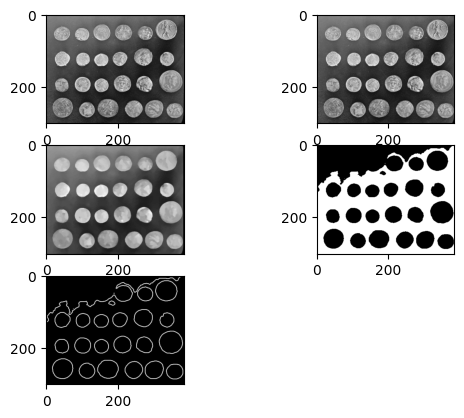

In [33]:
plt.subplot(321)
plt.imshow(img,'gray')
plt.subplot(322)
plt.imshow(img4,'gray')
plt.subplot(323)
plt.imshow(img44,'gray')
plt.subplot(324)
plt.imshow(img444,'gray')
plt.subplot(325)
plt.imshow(img4444,'gray')
plt.show()